In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

from datasets import load_dataset
from tqdm.notebook import tqdm

from navec import Navec

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from extractor.model import Extractor
from extractor.utils import create_target_mask, TaggingDataset

In [3]:
dataset = load_dataset('IlyaGusev/gazeta', revision="v2.0")

No config specified, defaulting to: gazeta/default
Found cached dataset gazeta (/home/goncharovglebig/.cache/huggingface/datasets/IlyaGusev___gazeta/default/2.0.0/c329f0fc1c22ab6e43e0045ee659d0d43c647492baa2a6ab3a5ea7dac98cd552)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_dataset = TaggingDataset(dataset['train']['text'], dataset['train']['summary'])
val_dataset = TaggingDataset(dataset['validation']['text'], dataset['validation']['summary'])

  0%|          | 0/60964 [00:00<?, ?it/s]

In [ ]:
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')
navec_emb_size = 300
vocab = navec.vocab

In [ ]:
def collate_batch(batch):
    art_list, target_list = [], []
    for art, target in batch:
        art_encoded = [vocab[tok] if tok in vocab else vocab.unk_id
                       for tok in art]
        art_list.append(torch.tensor(np.array(art_encoded)))
        target_list.append(torch.FloatTensor(np.array(target)))
        
    art_tensor_padded = pad_sequence(art_list, padding_value=vocab.pad_id).T
    target_tensor_padded = pad_sequence(target_list, padding_value=0).T
    return art_tensor_padded.to(device), target_tensor_padded.to(device)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=256, collate_fn=collate_batch)
val_loader = DataLoader(val_dataset, batch_size=256, collate_fn=collate_batch)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Extractor()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
min_loss = 99999
model.to(device)

params = list(model.parameters())
optimizer = torch.optim.Adagrad(params, lr=0.1, initial_accumulator_value=0.1)
criternion = nn.BCEWithLogitsLoss()

epoch_num = 90
train_loss_list, val_loss_list = [], []

for ep in tqdm(range(epoch_num)):
    for train_batch in tqdm(train_loader):
        src, target = train_batch
        out = model(src).squeeze()
        
        loss = criternion(out, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss = loss.detach().item()
        train_loss_list.append(train_loss)

    #Validation loop
    val_batch_loss = []
    with torch.no_grad():
        for val_batch in val_loader:
            src, target = train_batch
            out = model(src).squeeze()
            loss = criternion(out, target)
            val_batch_loss.append(loss.detach().item())
    val_loss = np.mean(val_batch_loss)
    val_loss_list.append(val_loss)
    if val_loss < min_loss:
        min_loss = val_loss
        print('Saving best model')
        torch.save(model, f'extractor.pth')

    print(f'For epoch #{ep} train loss {np.mean(train_loss_list[-250_000:])}, val loss {val_loss}')
    

Saving best model
For epoch #7 train loss 0.46334616447093596, val loss 0.44490158081054687


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #8 train loss 0.4578285845475438, val loss 0.44192117333412173


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #9 train loss 0.4531725849815991, val loss 0.43927457809448245


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #10 train loss 0.449182635264598, val loss 0.43704219818115236


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #11 train loss 0.4457158978140005, val loss 0.4355764973163605


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #12 train loss 0.44266974202758597, val loss 0.43417853116989136


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #13 train loss 0.43996231995402735, val loss 0.4328217601776123


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #14 train loss 0.4375347310030311, val loss 0.431732075214386


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #15 train loss 0.4353429638706615, val loss 0.43062313795089724


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #16 train loss 0.4333469646334384, val loss 0.4296907794475555


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #17 train loss 0.43151758370123483, val loss 0.42843363642692567


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #18 train loss 0.42983498375233614, val loss 0.42768046975135804


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #19 train loss 0.4282794010813765, val loss 0.42670886635780336


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #20 train loss 0.4268392797104508, val loss 0.4257167100906372


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #21 train loss 0.4255025120357816, val loss 0.42477720737457275


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #22 train loss 0.4242590605583715, val loss 0.42380457639694213


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #23 train loss 0.42309572130982015, val loss 0.4226683640480042


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #24 train loss 0.42200098290603033, val loss 0.4217353701591492


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #25 train loss 0.42096239980639927, val loss 0.42023345351219177


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #26 train loss 0.4199691839815202, val loss 0.41777320742607116


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
Saving best model
For epoch #28 train loss 0.4180672465679949, val loss 0.41408405542373655


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #29 train loss 0.4171689212031278, val loss 0.4134033334255218


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #30 train loss 0.4163074810336936, val loss 0.41238288044929505


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #31 train loss 0.4154790296885633, val loss 0.41171960353851317


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #32 train loss 0.41468547627894736, val loss 0.41071720242500304


  0%|          | 0/239 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



For epoch #46 train loss 0.4060850906916487, val loss 0.4039283907413483


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #47 train loss 0.4056003413512534, val loss 0.4028892922401428


  0%|          | 0/239 [00:00<?, ?it/s]

For epoch #48 train loss 0.4051286575709936, val loss 0.40303096294403074


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #49 train loss 0.404668207600027, val loss 0.4028620159626007


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #50 train loss 0.4042195824922887, val loss 0.4018055701255798


  0%|          | 0/239 [00:00<?, ?it/s]

For epoch #51 train loss 0.403790375070918, val loss 0.4021061158180237


  0%|          | 0/239 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Saving best model
For epoch #62 train loss 0.39958763004394376, val loss 0.3979503655433655


  0%|          | 0/239 [00:00<?, ?it/s]

For epoch #63 train loss 0.39924901367699, val loss 0.39799530982971193


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #64 train loss 0.39891934048757316, val loss 0.3976000761985779


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #65 train loss 0.3985951026896643, val loss 0.39736503720283506


  0%|          | 0/239 [00:00<?, ?it/s]

Saving best model
For epoch #66 train loss 0.3982752888049161, val loss 0.39711099028587343


  0%|          | 0/239 [00:00<?, ?it/s]

For epoch #67 train loss 0.39796071432103614, val loss 0.3972073996067047


  0%|          | 0/239 [00:00<?, ?it/s]

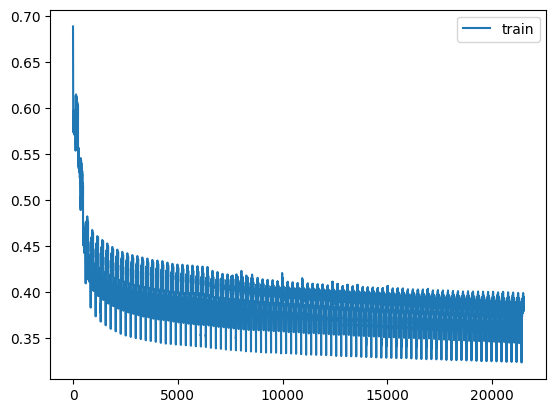

In [12]:
plt.plot(train_loss_list, label='train');
plt.legend();

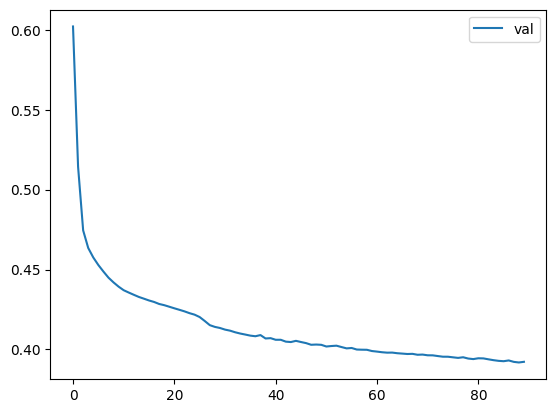

In [13]:
plt.plot(val_loss_list, label='val');
plt.legend();

In [28]:
from predictors import ExtractionPGenPredictor
from rouge import Rouge
import numpy as np

sample_size = 200
PG_MODEL_PATH = './pointer_gazeta.pth'
PG_VOCAB_PATH = './gazeta_voc.pth'
EXTR_MODEL_PATH = './extractor.pth'
sample_ind = np.random.randint(0, len(dataset['test']), sample_size)
threshold_list = np.linspace(0.005, 0.2, 20)
rouge_metric = Rouge()

In [29]:
rouge_list = []
for thr in tqdm(threshold_list):
    preds, targets = [], []
    extr = ExtractionPGenPredictor(
        ext_model_path=EXTR_MODEL_PATH,
        pg_model_path=PG_MODEL_PATH,
        pg_vocab_path=PG_VOCAB_PATH,
        device=device,
        threshold=thr)
    for ind in sample_ind:
        preds.append(extr.predict_one_sample(dataset['test']['text'][ind]))
        targets.append(dataset['test']['text'][ind].lower())
    rouge_list.append(rouge_metric.get_scores(preds, targets, avg=True)['rouge-1']['f'])

  0%|          | 0/20 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


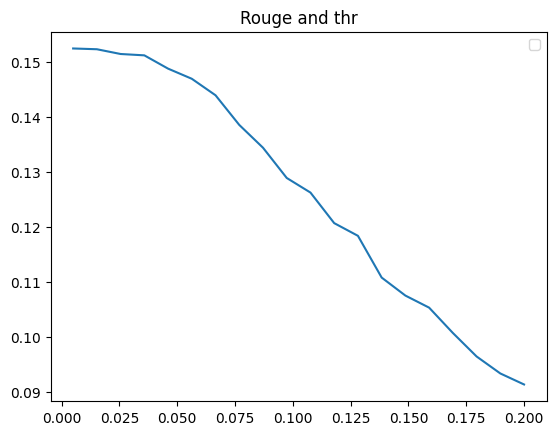

In [30]:
plt.title('Rouge and thr')
plt.plot(threshold_list, rouge_list)
plt.legend()